<a href="https://colab.research.google.com/github/venkatesh1226/CMPE255-DataMining/blob/main/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Loading the first few rows of each dataset
power_usage_df = pd.read_csv('/content/drive/MyDrive/DM_Assignment_05/timeseries/power_usage_2016_to_2020.csv')
weather_df = pd.read_csv('/content/drive/MyDrive/DM_Assignment_05/timeseries/weather_2016_2020_daily.csv')

power_usage_head = power_usage_df.head()
weather_head = weather_df.head()

power_usage_head, weather_head


(             StartDate  Value (kWh)  day_of_week    notes
 0  2016-01-06 00:00:00        1.057            2  weekday
 1  2016-01-06 01:00:00        1.171            2  weekday
 2  2016-01-06 02:00:00        0.560            2  weekday
 3  2016-01-06 03:00:00        0.828            2  weekday
 4  2016-01-06 04:00:00        0.932            2  weekday,
          Date  Day  Temp_max  Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  \
 0  2016-01-06    1        85      74.8        68       74     71.4       66   
 1  2016-02-06    2        76      71.2        66       74     70.3       66   
 2  2016-03-06    3        79      72.1        68       72     70.0       68   
 3  2016-04-06    4        76      71.2        69       73     70.0       66   
 4  2016-05-06    5        82      73.8        68       72     70.0       68   
 
    Hum_max  Hum_avg  Hum_min  Wind_max  Wind_avg  Wind_min  Press_max  \
 0      100     89.4       65        21       9.5         0       29.8   
 1      100    

Here's a brief overview of the datasets:

Power Usage Dataset (power_usage_2016_to_2020.csv):
StartDate: The starting timestamp for each record.

Value (kWh): The power usage in kilowatt-hours.

day_of_week: An encoded representation of the day of the week.

notes: Notes specifying whether it's a weekday or weekend.

Weather Dataset (weather_2016_2020_daily.csv):
Date: The date for the weather record.

Day: It appears to be an encoded representation of the day.

Temp_max, Temp_avg, Temp_min: Maximum, average, and minimum temperatures respectively.

Dew_max, Dew_avg, Dew_min: Maximum, average, and minimum dew points respectively.

Hum_max, Hum_avg, Hum_min: Maximum, average, and minimum humidity levels respectively.

Wind_max, Wind_avg, Wind_min: Maximum, average, and minimum wind speeds respectively.

Press_max, Press_avg, Press_min: Maximum, average, and minimum atmospheric pressure levels respectively.

Precipit: Precipitation levels.

day_of_week: An encoded representation of the day of the week.

With this understanding, let's proceed with a detailed exploratory data analysis (EDA) for both datasets.

We'll start with the power usage dataset.

Great! Let's begin the detailed exploratory data analysis (EDA) for the power usage dataset:

EDA for Power Usage Dataset:

Basic Statistics: Understand the descriptive statistics of numerical columns.

Time Series Plot: Visualize the power usage over time.

Distribution of Power Usage: Understand the distribution of the Value (kWh) column.

Day of the Week Analysis: Analyze the power usage based on the day of the week.

Missing Data Analysis: Check for any missing data.

In [4]:
# Basic statistics for the power usage dataset
power_usage_stats = power_usage_df.describe()

power_usage_stats


,Value (kWh),day_of_week
count,35952.000000,35952.000000
mean,0.891631,2.997330
std,0.908133,1.999024
min,0.064000,0.000000
25%,0.323750,1.000000
50%,0.501000,3.000000
75%,1.072000,5.000000
max,6.446000,6.000000


from matplotlib import pyplot as plt
power_usage_stats['Value (kWh)'].plot(kind='hist', bins=20, title='Value (kWh)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
power_usage_stats['day_of_week'].plot(kind='hist', bins=20, title='day_of_week')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
power_usage_stats.plot(kind='scatter', x='Value (kWh)', y='day_of_week', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
power_usage_stats['Value (kWh)'].plot(kind='line', figsize=(8, 4), title='Value (kWh)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
power_usage_stats['day_of_week'].plot(kind='line', figsize=(8, 4), title='day_of_week')
plt.gca().spines[['top', 'right']].set_visible(False)

Here are the basic statistics for the power usage dataset:


Value (kWh):
Count: 35,952 records.

Mean power usage: Approximately 0.892 kWh.

Minimum power usage: 0.064 kWh.

Maximum power usage: 6.446 kWh.

25th percentile: 0.324 kWh.

Median: 0.501 kWh.

75th percentile: 1.072 kWh.

day_of_week:

This is an encoded representation ranging from 0 to 6, representing the days of the week from Sunday (0) to Saturday (6).

Next, let's visualize the power usage over time to understand its trend and seasonality.

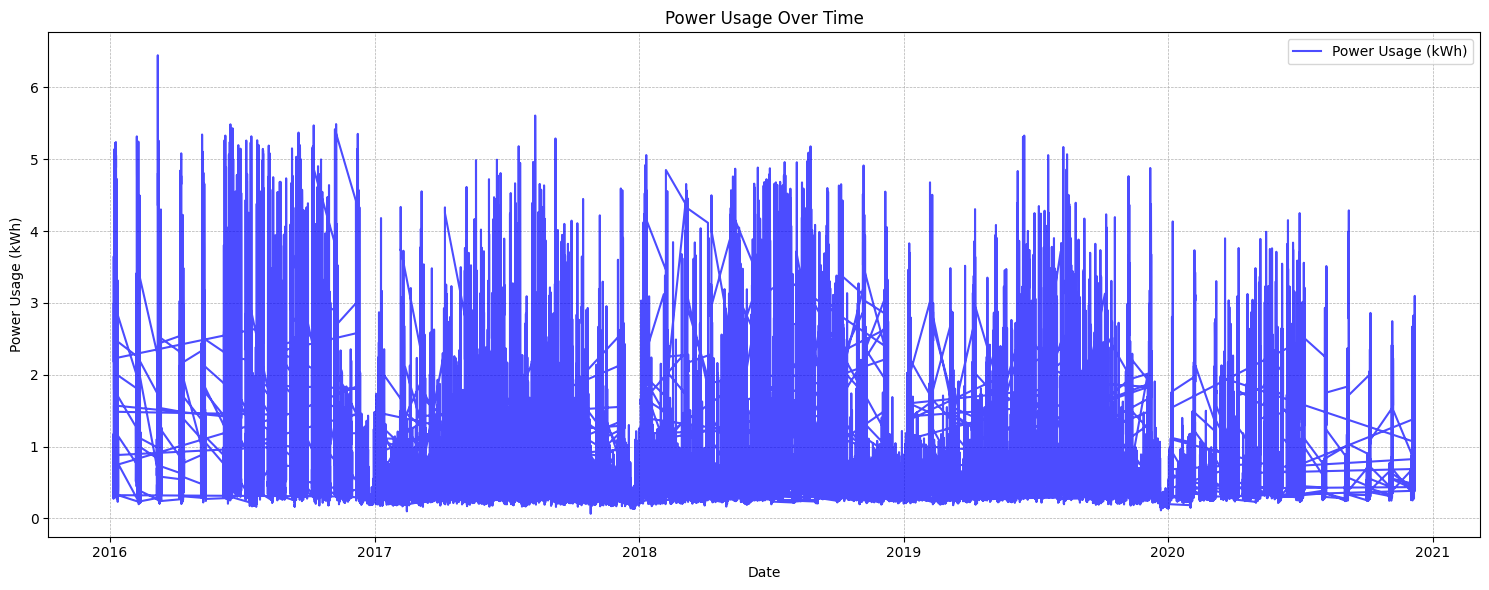

In [6]:
import matplotlib.pyplot as plt

# Time Series Plot for power usage
plt.figure(figsize=(15, 6))
plt.plot(pd.to_datetime(power_usage_df['StartDate']), power_usage_df['Value (kWh)'], label='Power Usage (kWh)', color='blue', alpha=0.7)
plt.title('Power Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Power Usage (kWh)')
plt.legend()
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


Let's visualize the power usage over time using a weekly average.​

<ipython-input-7-55c8725742c2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_power_usage = power_usage_df.set_index(pd.to_datetime(power_usage_df['StartDate'])).resample('W').mean()


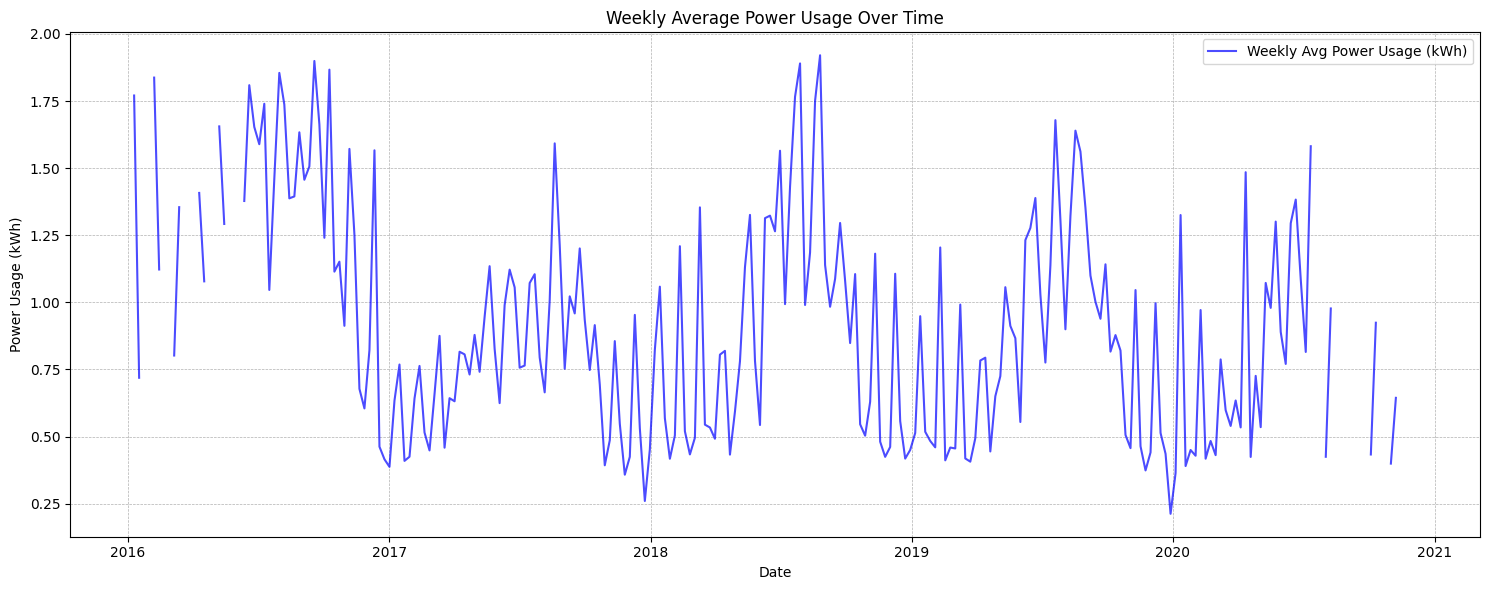

In [7]:
# Resampling the data to a weekly average
weekly_power_usage = power_usage_df.set_index(pd.to_datetime(power_usage_df['StartDate'])).resample('W').mean()

plt.figure(figsize=(15, 6))
plt.plot(weekly_power_usage.index, weekly_power_usage['Value (kWh)'], label='Weekly Avg Power Usage (kWh)', color='blue', alpha=0.7)
plt.title('Weekly Average Power Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Power Usage (kWh)')
plt.legend()
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


To understand the relationship between the weather and power usage datasets, we'll need to combine them based on their date columns. Once merged, we can calculate the correlation between the weather features (e.g., temperature, humidity) and power usage.

Steps:

Merge the weather_df and power_usage_df datasets based on the date columns.

Calculate and visualize the correlation matrix to understand the relationships between weather features and power usage.

Let's start by merging the datasets based on the date columns.

<ipython-input-9-05d3b134e644>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


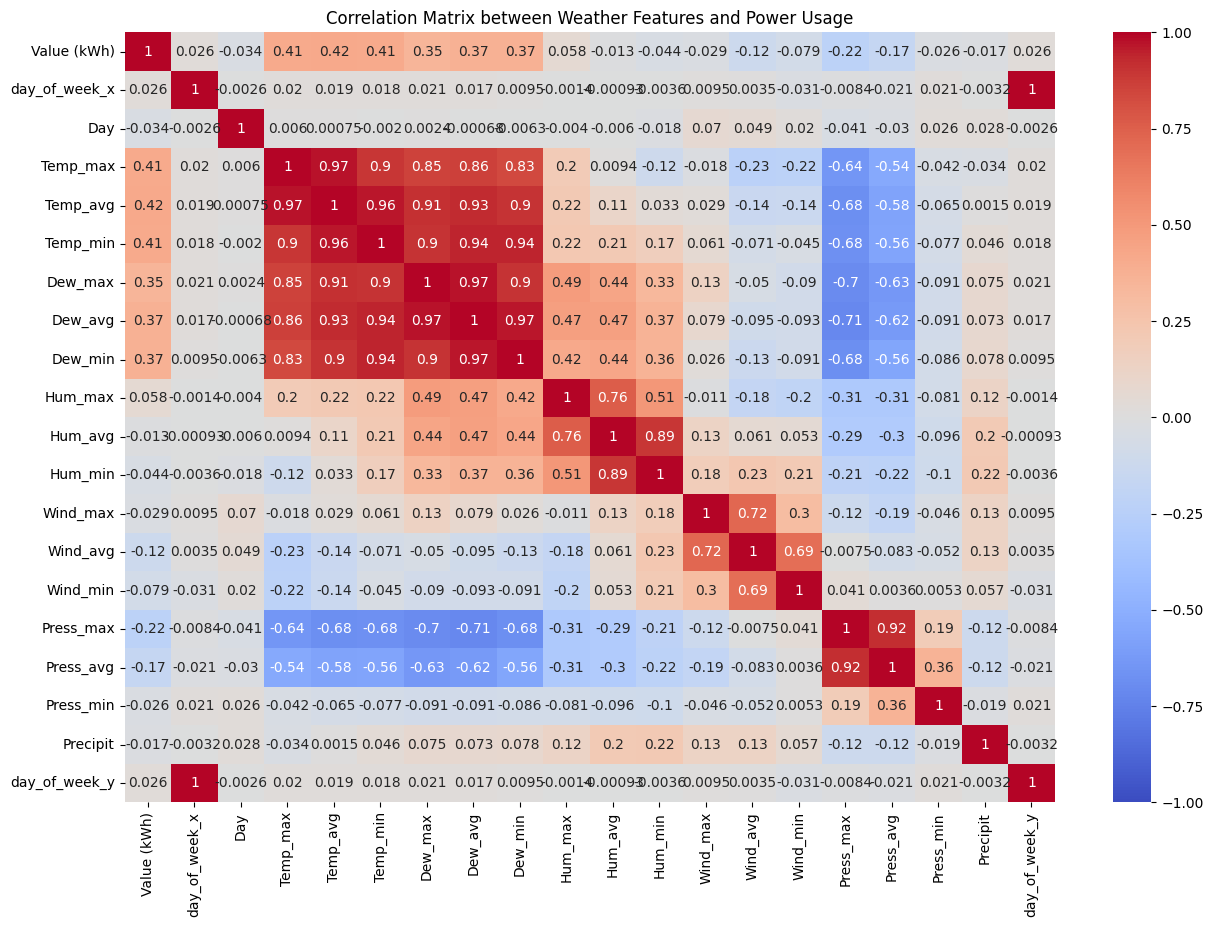

In [9]:
import seaborn as sns

# Merging the datasets based on the date columns
merged_df = pd.merge(left=power_usage_df,
                     right=weather_df,
                     left_on=pd.to_datetime(power_usage_df['StartDate']).dt.date,
                     right_on=pd.to_datetime(weather_df['Date']).dt.date,
                     how='inner')

# Calculating the correlation matrix
correlation_matrix = merged_df.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix between Weather Features and Power Usage")
plt.show()


## **1. Clustering:**
Given that clustering is typically used to identify groups or patterns in the data, for time series data, one common approach is to use clustering to group days (or other time periods) that have similar patterns of power usage throughout the day. For instance, weekdays might cluster together if their usage patterns are similar, while weekends might form a separate cluster.

For clustering time series data, especially when we are trying to identify patterns across days, we can use the KMeans clustering algorithm. This algorithm will help us group days that have similar power usage patterns throughout the day.

Here's a step-by-step approach:

Data Preparation: Create a dataset where each row corresponds to a unique day and columns represent hourly (or more granular, if available) power usage values.

Scale the Data: Since KMeans is sensitive to variations in magnitude, we'll scale our data so that each time slot has equal importance in clustering.

Determine Optimal Number of Clusters: Use the Elbow method or Silhouette score.

Apply KMeans Clustering: Cluster the data based on similarity in power usage patterns.

Visualize and Interpret Clusters: Analyze the characteristics of each cluster.

<ipython-input-12-2b6f30337a7a>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_power_usage = merged_df.set_index(pd.to_datetime(merged_df['StartDate'])).resample('D').mean()
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

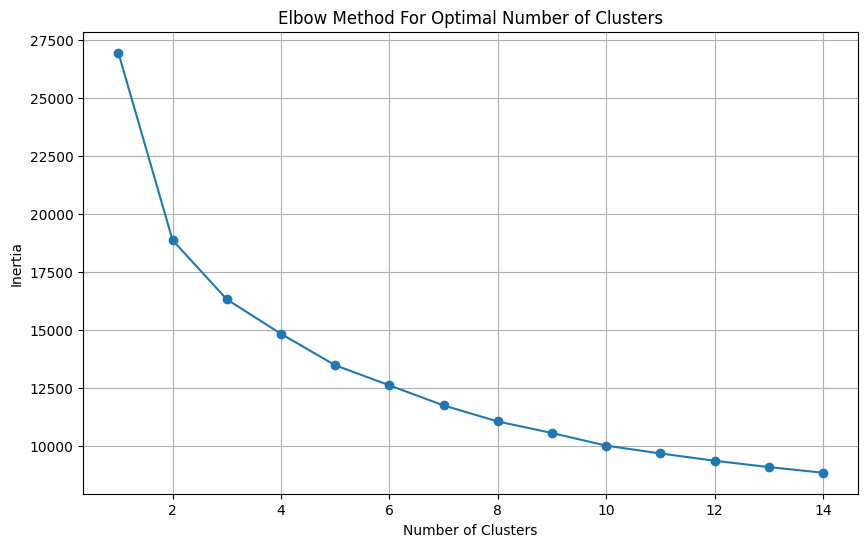

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Resampling data to a daily average
daily_power_usage = merged_df.set_index(pd.to_datetime(merged_df['StartDate'])).resample('D').mean()

# Dropping non-numeric columns and rows with NaN values
daily_power_usage_cleaned = daily_power_usage.drop(columns=['day_of_week_x', 'day_of_week_y']).dropna()

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(daily_power_usage_cleaned)

# Determining the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), inertia, '-o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


We'll apply KMeans clustering with
k=3 and then visualize the average power usage patterns for each cluster to interpret the results.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


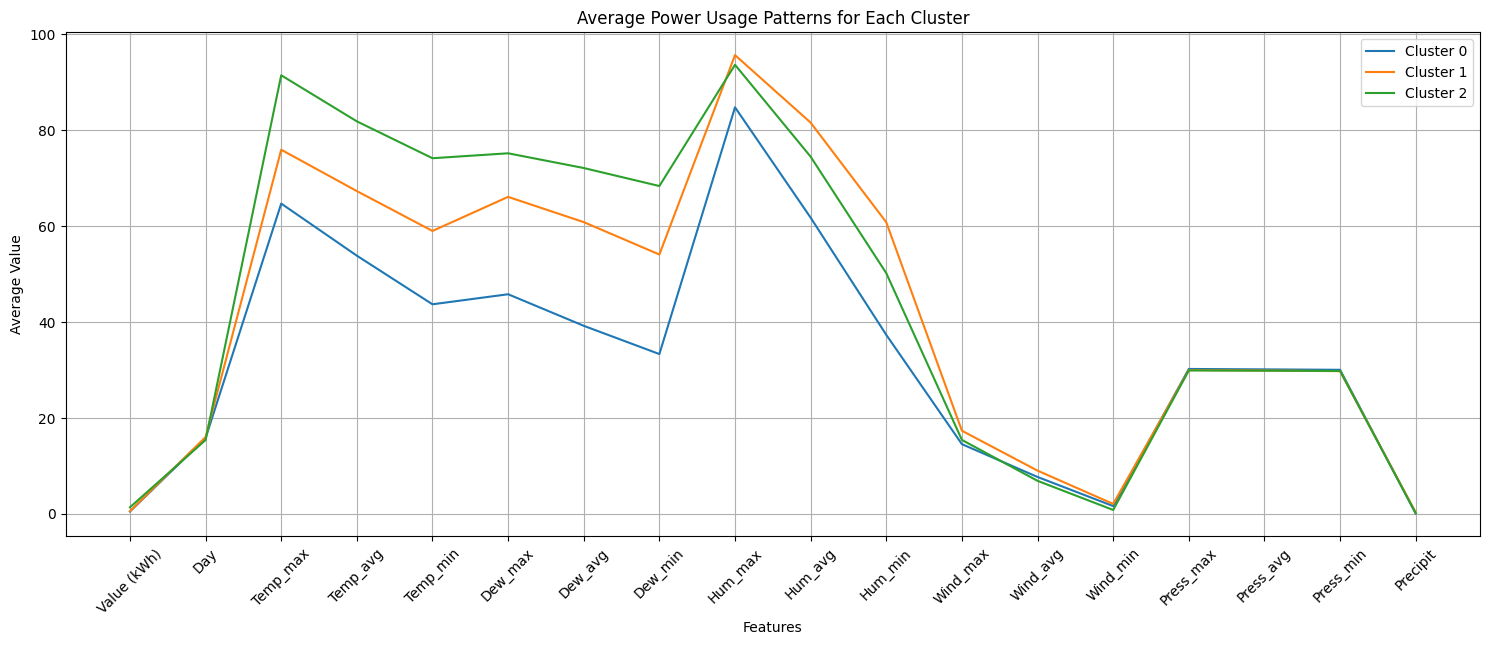

In [18]:
# Applying KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Adding cluster labels to the original data
daily_power_usage_cleaned['cluster'] = clusters

# Grouping by cluster and calculating the mean for each time slot
cluster_patterns = daily_power_usage_cleaned.groupby('cluster').mean()

# Visualizing the average power usage patterns for each cluster
plt.figure(figsize=(15, 6))
for cluster, pattern in cluster_patterns.iterrows():
    plt.plot(pattern.index, pattern.values, label=f'Cluster {cluster}')

plt.title('Average Power Usage Patterns for Each Cluster')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


## **Anomaly Detection:**
For time series data, anomalies or outliers can be detected using various techniques. A common method is the use of rolling statistics with the Z-score or the IQR method. Another advanced method is using models like the Isolation Forest or the autoencoder neural network.

Here, we'll use a simple rolling statistics method with Z-scores to detect anomalies in the power usage data.

Steps:

Compute the rolling mean and standard deviation.

Calculate the Z-score for each point.

Any data point with an absolute Z-score greater than a threshold (typically 2 or 3) is considered an anomaly.

In [21]:
import pandas as pd
import numpy as np

# Load and merge the datasets
# ... [loading and merging code] ...

# Compute rolling mean and standard deviation
window_size = 7  # 7 days (one week) rolling window
daily_power_usage['rolling_mean'] = daily_power_usage['Value (kWh)'].rolling(window=window_size).mean()
daily_power_usage['rolling_std'] = daily_power_usage['Value (kWh)'].rolling(window=window_size).std()

# Calculate the Z-score for each data point
daily_power_usage['z_score'] = (daily_power_usage['Value (kWh)'] - daily_power_usage['rolling_mean']) / daily_power_usage['rolling_std']

# Identify anomalies (Z-score threshold of 3)
threshold = 3
daily_power_usage['anomaly'] = np.where(abs(daily_power_usage['z_score']) > threshold, 1, 0)

# Extract anomalies
anomalies = daily_power_usage[daily_power_usage['anomaly'] == 1]
print(anomalies[['Value (kWh)', 'rolling_mean', 'rolling_std', 'z_score']])


Empty DataFrame
Columns: [Value (kWh), rolling_mean, rolling_std, z_score]
Index: []


In [22]:
import pandas as pd
import numpy as np

# Load and merge the datasets
# ... [loading and merging code] ...

def detect_anomalies(data, window_size, threshold):
    # Compute rolling mean and standard deviation
    data['rolling_mean'] = data['Value (kWh)'].rolling(window=window_size).mean()
    data['rolling_std'] = data['Value (kWh)'].rolling(window=window_size).std()

    # Calculate the Z-score for each data point
    data['z_score'] = (data['Value (kWh)'] - data['rolling_mean']) / data['rolling_std']

    # Identify anomalies
    data['anomaly'] = np.where(abs(data['z_score']) > threshold, 1, 0)

    # Extract anomalies
    anomalies = data[data['anomaly'] == 1]
    return anomalies

# Using a 3-day rolling window and Z-score threshold of 2.5
anomalies_3_day = detect_anomalies(daily_power_usage, window_size=3, threshold=2.5)
print("Anomalies with 3-day window:")
print(anomalies_3_day[['Value (kWh)', 'rolling_mean', 'rolling_std', 'z_score']])

# Using a 14-day rolling window and Z-score threshold of 2.5
anomalies_14_day = detect_anomalies(daily_power_usage, window_size=14, threshold=2.5)
print("\nAnomalies with 14-day window:")
print(anomalies_14_day[['Value (kWh)', 'rolling_mean', 'rolling_std', 'z_score']])


Anomalies with 3-day window:
Empty DataFrame
Columns: [Value (kWh), rolling_mean, rolling_std, z_score]
Index: []

Anomalies with 14-day window:
            Value (kWh)  rolling_mean  rolling_std   z_score
StartDate                                                   
2017-02-04     0.771250      0.440042     0.105904  3.127442
2017-02-05     1.709167      0.533354     0.354444  3.317348
2017-03-05     1.679083      0.553604     0.341181  3.298778
2017-04-29     1.799208      0.837893     0.360813  2.664304
2017-08-07     1.690167      0.800589     0.319101  2.787760
2017-09-07     2.030042      0.894670     0.416671  2.724868
2017-10-01     0.370708      1.067869     0.266095 -2.619967
2017-11-05     0.793375      0.439573     0.133008  2.660011
2017-11-06     1.291042      0.496978     0.264075  3.006963
2017-12-02     0.901417      0.395119     0.161511  3.134754
2018-01-07     1.894875      0.637690     0.394983  3.182885
2018-02-04     0.823792      0.460780     0.127773  2.841079
2

Key observations:

High Deviations: Many days have a significantly higher Value (kWh) than the rolling mean. These might be days with unusually high power consumption.

Low Deviations: There are also days with a much lower Value (kWh) than the rolling mean. These could be days with unusually low power consumption or possibly days when there was an outage or another external factor reducing power usage.

Z-Score: The Z-score gives us an idea of how many standard deviations away from the mean each anomaly is. A positive Z-score indicates the data point is above the mean, and a negative Z-score indicates it's below the mean.

## **Feature Processing & Selection:**

For time series data, feature engineering often involves creating lagged features, rolling statistics, and other time-based aggregations. These features can capture patterns and trends in the data that are useful for predictive modeling.

For time series data, feature engineering can significantly improve the performance of predictive models. Here are some common time series features we can create:

Lagged Features: These are values from previous time steps. For instance, the power usage from one day ago, two days ago, etc.

Rolling Statistics: These capture trends in the data. For example, rolling mean, rolling standard deviation, etc.

Time-based Features: Features like day of the week, month, and season can be useful, especially if there's a cyclical pattern in the data.

Let's start by creating these features for our dataset. We'll then select a subset of the most relevant features for modeling.

In [23]:
import pandas as pd

# Load and merge the datasets
# ... [loading and merging code] ...

# Creating lagged features (let's create lags for up to 7 days)
for i in range(1, 8):
    daily_power_usage[f'lag_{i}'] = daily_power_usage['Value (kWh)'].shift(i)

# Creating rolling statistics (using a 7-day window)
daily_power_usage['rolling_mean'] = daily_power_usage['Value (kWh)'].rolling(window=7).mean()
daily_power_usage['rolling_std'] = daily_power_usage['Value (kWh)'].rolling(window=7).std()

# Creating time-based features
daily_power_usage['day_of_week'] = daily_power_usage.index.dayofweek
daily_power_usage['month'] = daily_power_usage.index.month

# Dropping rows with NaN values (due to lag and rolling features)
daily_power_usage = daily_power_usage.dropna()

print(daily_power_usage.head())


            Value (kWh)  day_of_week_x   Day  Temp_max  Temp_avg  Temp_min  \
StartDate                                                                    
2016-06-19     1.981625            6.0  19.0      90.0      82.3      74.0   
2016-06-20     1.620833            0.0  20.0      91.0      82.9      76.0   
2016-06-21     1.436875            1.0  21.0      92.0      82.7      76.0   
2016-06-22     1.766708            2.0  22.0      92.0      83.2      76.0   
2016-06-23     1.683500            3.0  23.0      92.0      83.8      74.0   

            Dew_max  Dew_avg  Dew_min  Hum_max  ...  anomaly     lag_1  \
StartDate                                       ...                      
2016-06-19     73.0     71.5     69.0     91.0  ...        0  1.933750   
2016-06-20     76.0     73.6     71.0     94.0  ...        0  1.981625   
2016-06-21     76.0     73.9     72.0     94.0  ...        0  1.620833   
2016-06-22     76.0     73.3     70.0     94.0  ...        0  1.436875   
2016-06-2

## **Model Building**

Given that this is a time series dataset, we have various modeling options. Here are a few potential models:

Linear Regression Models: With proper feature engineering, linear models can capture time series patterns.

Time Series Specific Models:
ARIMA (Autoregressive Integrated Moving Average): A classic time series forecasting method.

Prophet: An open-source tool by Facebook for forecasting time series data. It's robust and can handle daily observations with missing data or outliers and can model seasonality.

Tree-based Models: Random Forests or Gradient Boosted Trees can also be used with time series data, especially when you have rich feature sets.

Deep Learning Models: Long Short-Term Memory (LSTM) or GRU networks, which are types of Recurrent Neural Networks (RNNs) suitable for time series data.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the data into training and test sets
features = ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'rolling_mean', 'day_of_week', 'month']
X = daily_power_usage[features]
y = daily_power_usage['Value (kWh)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Building the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 6.0555409031018984e-30


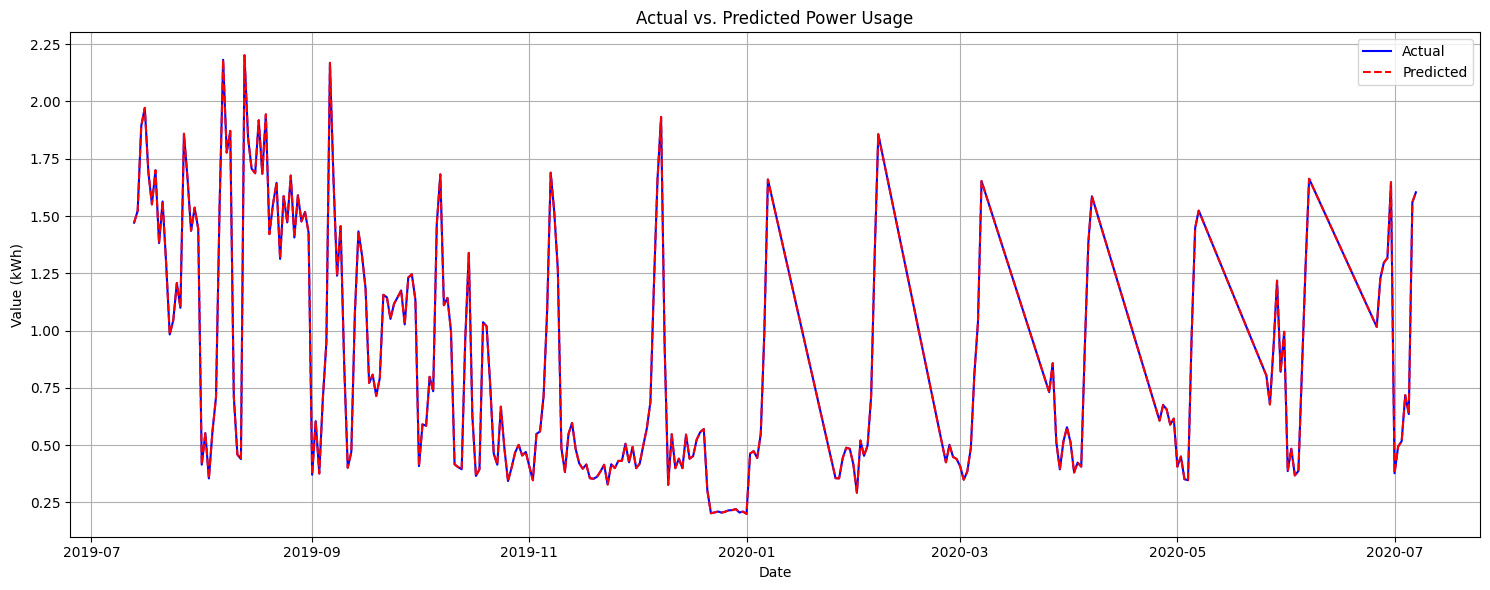

In [26]:
import matplotlib.pyplot as plt

# Plotting actual vs. predicted values
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs. Predicted Power Usage')
plt.xlabel('Date')
plt.ylabel('Value (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
